# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get started with web scraping. I will use a package called `BeautifulSoup` to collect the data from the web. Once I've collected the data and saved it into a local `.csv` file I should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [31]:
#importing required libraries

import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [32]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 40
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [24]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Really terrible user experi...
1,✅ Trip Verified | Very impressed with BA. Chec...
2,"✅ Trip Verified | LHR - SFO, LAS - LGW August..."
3,Not Verified | I flew from Malaga via LHR to...
4,✅ Trip Verified | Milan to Miami return via L...


In [33]:
df.to_csv("C:/Users/manoj/Downloads/British Airways/BA_reviews.csv")

Great! Now we have our dataset for the task 1 (Web scrapping and Customer sentiment analysis)! The loops above collected 2000 reviews by iterating through the paginated pages on the website. However, if we want to collect more data, we can try increasing the number of pages!

The next thing that we should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

### Cleaning the Data

In [34]:
#removing the unnecessary texts 

import re

def clean_review(review):
    # Remove leading and trailing whitespaces
    cleaned_review = review.strip()
    
    # Remove common phrase "✅ Trip Verified"
    cleaned_review = cleaned_review.replace("✅ Trip Verified", "")
    
    # Convert text to lowercase
    cleaned_review = cleaned_review.lower()
    
    # Remove punctuation marks and special characters
    cleaned_review = re.sub(r'[^\w\s]', '', cleaned_review)
    
    # Remove extra whitespaces and newlines
    cleaned_review = re.sub(r'\s+', ' ', cleaned_review)
    
    return cleaned_review

# Apply the cleaning function to each review in the DataFrame
df['cleaned_reviews'] = df['reviews'].apply(clean_review)

# Display the first few rows of the DataFrame with cleaned reviews
print(df.head())


                                             reviews  \
0  ✅ Trip Verified |  Really terrible user experi...   
1  ✅ Trip Verified | Very impressed with BA. Chec...   
2  ✅ Trip Verified |  LHR - SFO, LAS - LGW August...   
3  Not Verified |   I flew from Malaga via LHR to...   
4  ✅ Trip Verified |  Milan to Miami return via L...   

                                     cleaned_reviews  
0   really terrible user experience british airwa...  
1   very impressed with ba check in online was a ...  
2   lhr sfo las lgw august 2023 in club world its...  
3  not verified i flew from malaga via lhr to bos...  
4   milan to miami return via london worst busine...  


In [30]:
# Save the DataFrame with cleaned data to a CSV file
df.to_csv("C:/Users/manoj/Downloads/British Airways/Cleaned_BA_reviews.csv", index=False)

Now, we have a DataFrame containing the cleaned review data, and it's ready for analysis. The next step would be to prepare the data further and perform our analysis to uncover insights. We would first perform text preprocessing, and creating word clouds, sentiment analysis, and finally, topic modeling to understand the content of the reviews.

#### text processing

In [37]:
#importing the required libraries for text processing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manoj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manoj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\manoj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [38]:
# Initialize WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function for text preprocessing
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words]
    
    # Lemmatize tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Join tokens back into a single string
    preprocessed_text = ' '.join(lemmatized_tokens)
    
    return preprocessed_text

# Apply text preprocessing to each review in the DataFrame
df['preprocessed_reviews'] = df['cleaned_reviews'].apply(preprocess_text)

In [39]:
# Display the first few rows of the DataFrame with preprocessed reviews
print(df.head())

                                             reviews  \
0  ✅ Trip Verified |  Really terrible user experi...   
1  ✅ Trip Verified | Very impressed with BA. Chec...   
2  ✅ Trip Verified |  LHR - SFO, LAS - LGW August...   
3  Not Verified |   I flew from Malaga via LHR to...   
4  ✅ Trip Verified |  Milan to Miami return via L...   

                                     cleaned_reviews  \
0   really terrible user experience british airwa...   
1   very impressed with ba check in online was a ...   
2   lhr sfo las lgw august 2023 in club world its...   
3  not verified i flew from malaga via lhr to bos...   
4   milan to miami return via london worst busine...   

                                preprocessed_reviews  
0  really terrible user experience british airway...  
1  impressed ba check online little convoluted ev...  
2  lhr sfo la lgw august 2023 club world shame br...  
3  verified flew malaga via lhr boston 4th may 20...  
4  milan miami return via london worst business c..

#### Exploratory Data Analysis (EDA)

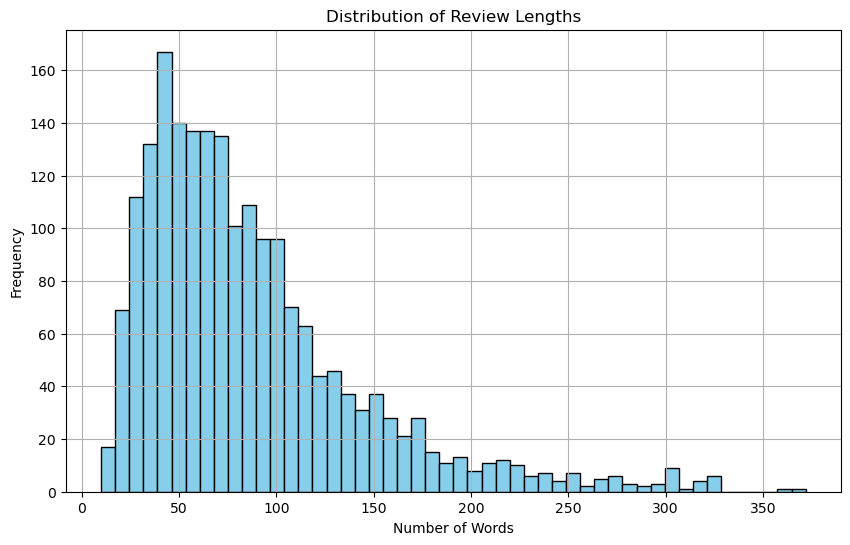

In [40]:
# Calculate the number of words in each review
df['review_length'] = df['preprocessed_reviews'].apply(lambda x: len(x.split()))

# Plot the distribution of review lengths
plt.figure(figsize=(10, 6))
plt.hist(df['review_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

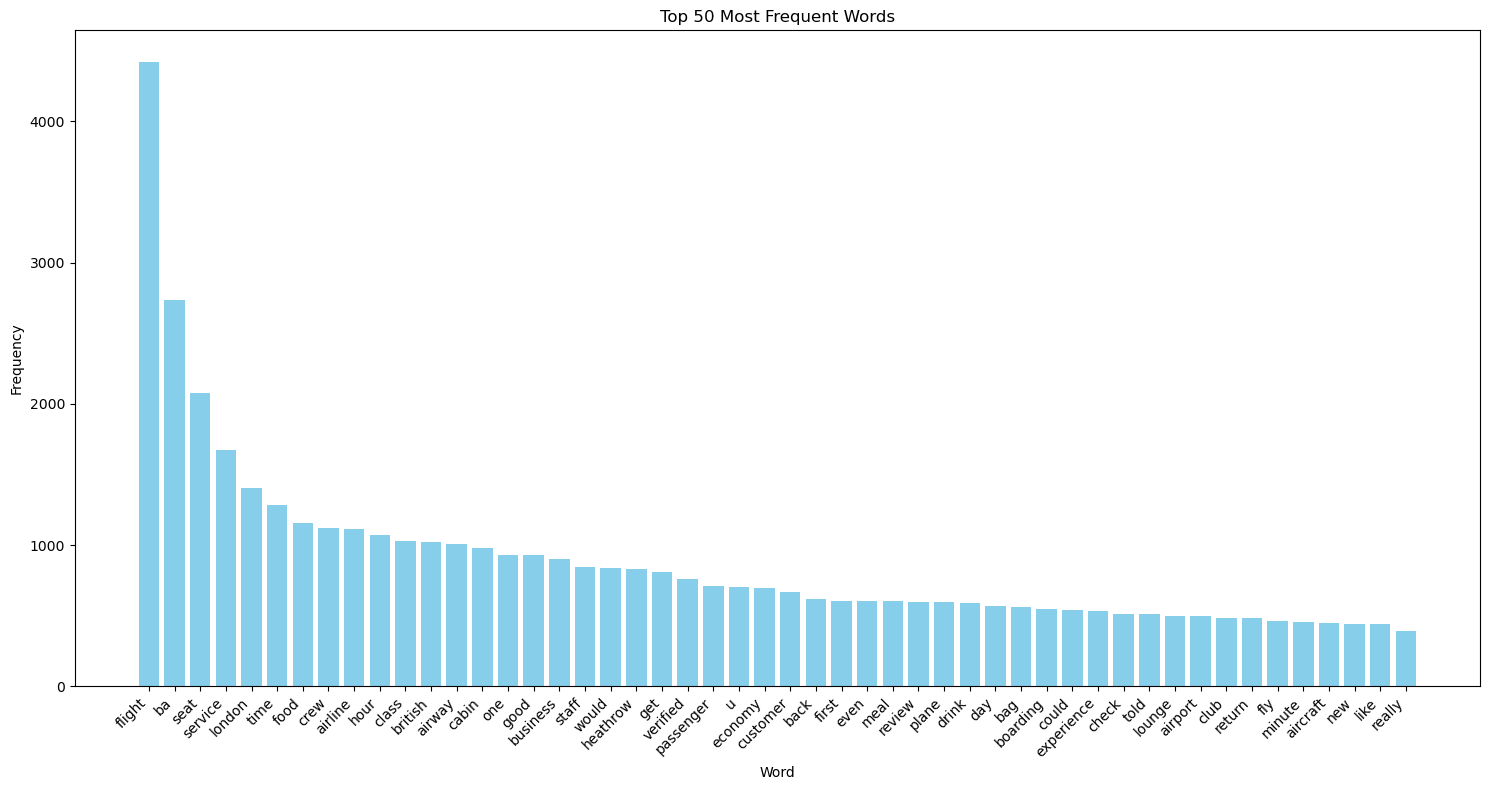

In [44]:
from collections import Counter

# Concatenate all preprocessed reviews into a single string
all_reviews = ' '.join(df['preprocessed_reviews'])

# Tokenize the concatenated string
tokens = word_tokenize(all_reviews)

# Calculate the frequency of each word
word_freq = Counter(tokens)

# Get the top N most frequent words
top_n_words = word_freq.most_common(50)

# Plot the top N most frequent words
plt.figure(figsize=(15, 8))
plt.bar([word[0] for word in top_n_words], [word[1] for word in top_n_words], color='skyblue')
plt.title('Top 50 Most Frequent Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

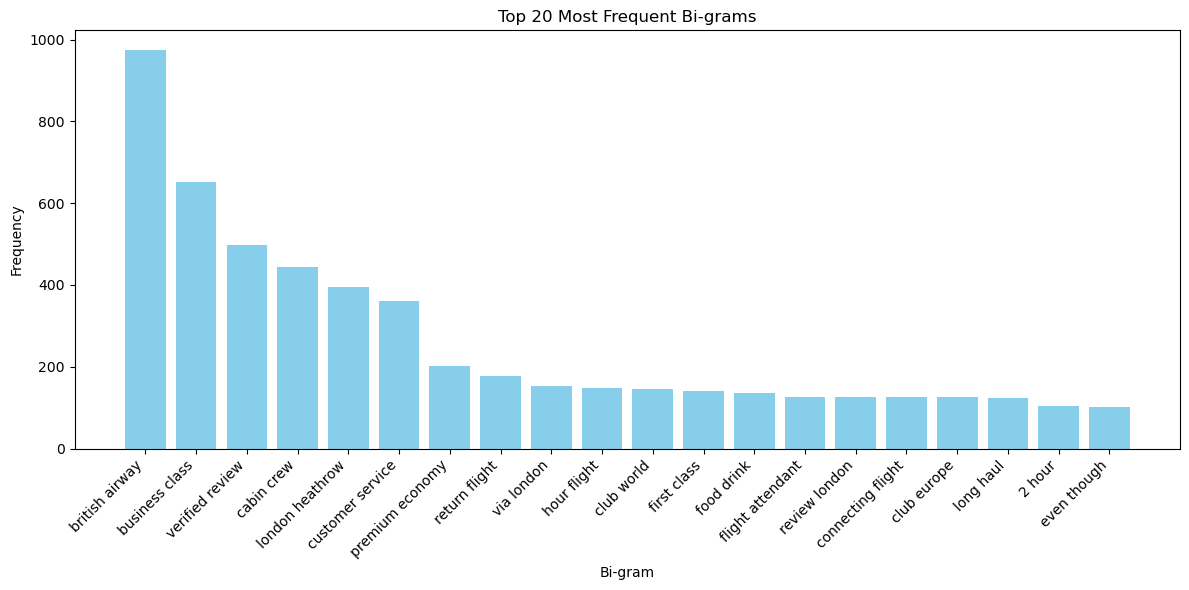

In [45]:
from nltk.util import ngrams

# Function to extract bi-grams from text
def extract_ngrams(text, n):
    # Tokenize text
    tokens = word_tokenize(text)
    # Extract n-grams
    n_grams = ngrams(tokens, n)
    return [' '.join(grams) for grams in n_grams]

# Extract bi-grams from all reviews
all_bi_grams = [gram for review in df['preprocessed_reviews'] for gram in extract_ngrams(review, 2)]

# Calculate the frequency of each bi-gram
bi_gram_freq = Counter(all_bi_grams)

# Get the top 20 most frequent bi-grams
top_20_bi_grams = bi_gram_freq.most_common(20)

# Plot the top 20 most frequent bi-grams
plt.figure(figsize=(12, 6))
plt.bar([bi_gram[0] for bi_gram in top_20_bi_grams], [bi_gram[1] for bi_gram in top_20_bi_grams], color='skyblue')
plt.title('Top 20 Most Frequent Bi-grams')
plt.xlabel('Bi-gram')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Creating Word Cloud for our dataset

In [47]:
pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 330.3 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/300.2 kB 751.6 kB/s eta 0:00:01
   ----------------------- ---------------- 174.1/300.2 kB 1.1 MB/s eta 0:00:01
   -------------------------------- ------- 245.8/300.2 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


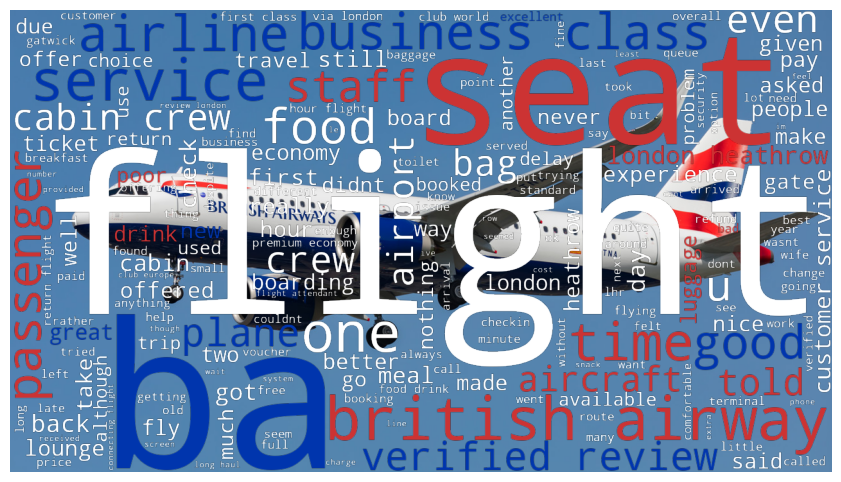

In [109]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Concatenate all preprocessed reviews into a single string
all_reviews = ' '.join(df['preprocessed_reviews'])

# Load your custom background image
background_image = np.array(Image.open("british-airways-logo-on-plane-01.JPEG"))

# Define colors for the word cloud
color_to_words = {
    "#CC3333": ["bad", "poor", "terrible","drink","told","luggage","staff","time","aircraft","british airway","seat","london heathrow","passenger"],  # Red color for negative sentiment words
    "#0035AD": ["good", "excellent", "great", "british", "plane", "verified review", "new", "service","ba","review","business class","airline"]  # Blue color for positive sentiment words
}

# Create a function to generate word colors based on the color_to_words dictionary
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    for color, words in color_to_words.items():
        if word in words:
            return color
    return 'white'  # Default color if word not found in color_to_words

# Generate the word cloud with custom background image and colors
wordcloud = WordCloud(width=1280, height=720, background_color=None, mode='RGBA', colormap='viridis', color_func=color_func).generate(all_reviews)

# Overlay the word cloud on the custom background image
plt.figure(figsize=(12, 6))
plt.imshow(background_image, interpolation='bilinear')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


#### Topic Modeling

In [119]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Define the number of topics
num_topics = 10  # You can adjust this number based on your preference or domain knowledge

# Initialize CountVectorizer to convert text to a matrix of token counts
vectorizer = CountVectorizer(max_features=1000,  # Limit the number of features to improve performance
                             max_df=0.8,        # Ignore terms that appear in more than 80% of documents
                             min_df=5,          # Ignore terms that appear in fewer than 5 documents
                             stop_words='english')

# Fit and transform the preprocessed reviews to a document-term matrix
X = vectorizer.fit_transform(df['preprocessed_reviews'])

# Initialize LDA model
lda_model = LatentDirichletAllocation(n_components=num_topics,  # Number of topics
                                      max_iter=10,             # Maximum number of iterations
                                      learning_method='online',
                                      random_state=42,          # Random state for reproducibility
                                      n_jobs=-1)               # Use all available CPU cores

# Fit LDA model to the document-term matrix
lda_model.fit(X)

# Function to display the top words for each topic
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))
        print()

# Get feature names from the vectorizer's vocabulary
feature_names = vectorizer.get_feature_names_out()

# Display the top words for each topic
num_top_words = 50
display_topics(lda_model, feature_names, num_top_words)



Topic 1:
a380 san deck hong kong upper return journey seat london movie francisco jfk kid boston lhr baggage entertainment poor cathay good verified october wont outdated hour time sleeping issue 12 inflight fine recommend box york legroom leg used 11 properly taken great ife overall service ok recline condition appalling family

Topic 2:
seat ba airline london service verified food review fly british airway time drink extra heathrow hour water plane dont im paid price customer pay long attendant leg charge year flying didnt free budget room haul ryanair offered like work bad make uncomfortable return got expensive row terrible flew staff tea

Topic 3:
ba customer day told hour service london airway british cancelled airport booked ticket refund time airline phone email booking got asked bag voucher later luggage said help received number fly return hotel travel week home lost called tried new heathrow issue compensation month online change given claim verified website pay

Topic 4:
br

In [120]:
# Function to display the top words for each topic
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))
        print()

# Get feature names from the vectorizer's vocabulary
feature_names = vectorizer.get_feature_names_out()

# Display the top words for each topic
num_top_words = 10  # Adjust the number of top words to display as needed
display_topics(lda_model, feature_names, num_top_words)


Topic 1:
a380, san, deck, hong, kong, upper, return, journey, seat, london

Topic 2:
seat, ba, airline, london, service, verified, food, review, fly, british

Topic 3:
ba, customer, day, told, hour, service, london, airway, british, cancelled

Topic 4:
british, airway, london, luggage, gold, suitcase, member, service, miami, allowed

Topic 5:
covid, virgin, travel, year, january, date, negative, march, atlantic, ba

Topic 6:
ba, airline, review, verified, service, staff, heathrow, year, carrier, crew

Topic 7:
london, late, hour, delayed, minute, arrived, heathrow, time, terminal, connection

Topic 8:
boarding, check, bag, staff, passenger, time, hour, plane, gate, ba

Topic 9:
class, seat, business, economy, ba, premium, service, food, passenger, cabin

Topic 10:
crew, good, food, cabin, meal, service, seat, drink, time, london



Topic Distribution:
dominant_topic
0    0.0020
1    0.1410
2    0.2065
3    0.0180
4    0.0010
5    0.0890
6    0.0110
7    0.0990
8    0.1595
9    0.2730
Name: proportion, dtype: float64


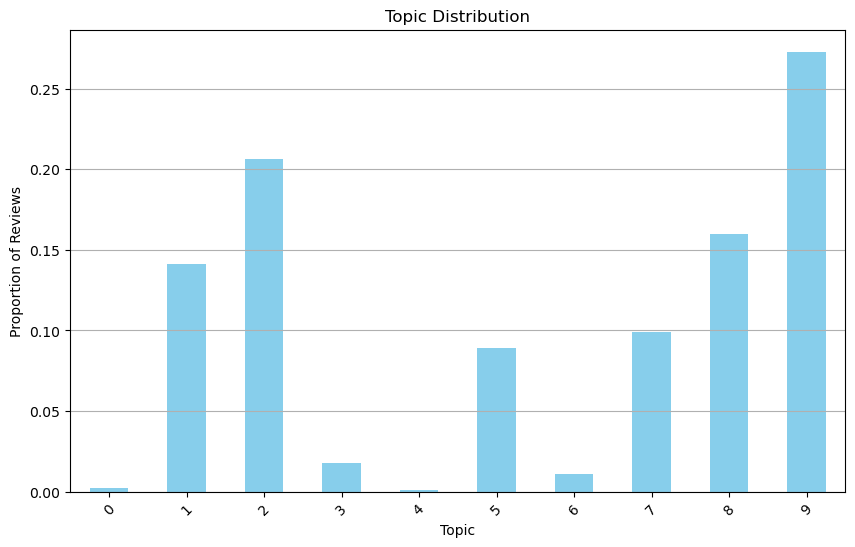

In [127]:
# Function to assign each review to the most dominant topic
def assign_dominant_topic(lda_model, corpus):
    dominant_topics = []
    for doc in corpus:
        topic_probs = lda_model.transform(doc)
        dominant_topic = topic_probs.argmax()
        dominant_topics.append(dominant_topic)
    return dominant_topics

# Assign each review to the most dominant topic
df['dominant_topic'] = assign_dominant_topic(lda_model, X)

# Calculate the frequency of each dominant topic
topic_distribution = df['dominant_topic'].value_counts(normalize=True).sort_index()

# Display the topic distribution
print("Topic Distribution:")
print(topic_distribution)

# Visualization of topic distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
topic_distribution.plot(kind='bar', color='skyblue')
plt.title('Topic Distribution')
plt.xlabel('Topic')
plt.ylabel('Proportion of Reviews')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


#### Sentiment Analysis

1. Sentiment Classification: We'll use the VADER sentiment analyzer to classify the sentiment of each review as positive, negative, or neutral.
2. Sentiment Visualization: We'll visualize the distribution of sentiment across the reviews using bar plots to understand the overall sentiment of customers.

Here's the sentiment analysis I have done:

In [139]:
import nltk
# Download NLTK resources (including the VADER lexicon)
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to classify the sentiment of each review
def classify_sentiment(review):
    # Get the polarity scores of the review
    scores = sid.polarity_scores(review)
    
    # Classify the sentiment based on the compound score
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment classification to each review in the DataFrame
df['sentiment'] = df['cleaned_reviews'].apply(classify_sentiment)
df.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\manoj\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,reviews,cleaned_reviews,preprocessed_reviews,review_length,dominant_topic,sentiment
0,✅ Trip Verified | Really terrible user experi...,really terrible user experience british airwa...,really terrible user experience british airway...,19,1,negative
1,✅ Trip Verified | Very impressed with BA. Chec...,very impressed with ba check in online was a ...,impressed ba check online little convoluted ev...,76,1,positive
2,"✅ Trip Verified | LHR - SFO, LAS - LGW August...",lhr sfo las lgw august 2023 in club world its...,lhr sfo la lgw august 2023 club world shame br...,173,0,positive
3,Not Verified | I flew from Malaga via LHR to...,not verified i flew from malaga via lhr to bos...,verified flew malaga via lhr boston 4th may 20...,78,2,negative
4,✅ Trip Verified | Milan to Miami return via L...,milan to miami return via london worst busine...,milan miami return via london worst business c...,82,8,negative


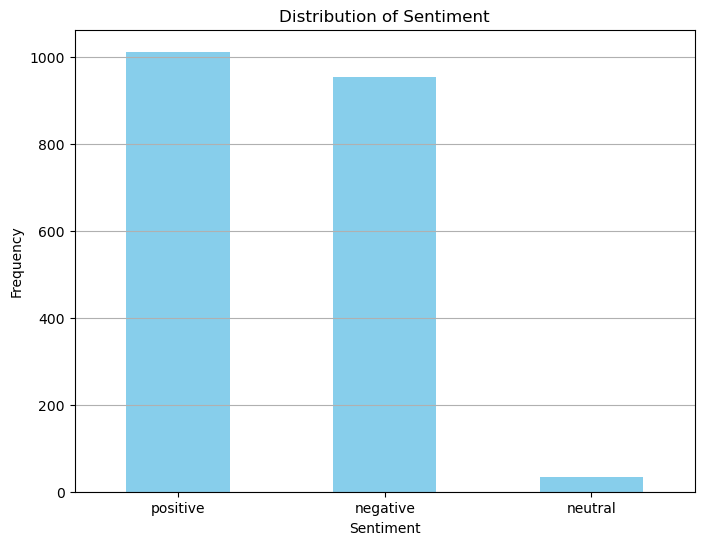

In [131]:
import matplotlib.pyplot as plt

# Function to plot the distribution of sentiment
def plot_sentiment_distribution(sentiment_distribution):
    plt.figure(figsize=(8, 6))
    sentiment_distribution.plot(kind='bar', color='skyblue')
    plt.title('Distribution of Sentiment')
    plt.xlabel('Sentiment')
    plt.ylabel('Frequency')
    plt.xticks(rotation=0)
    plt.grid(axis='y')
    plt.show()

# Calculate the distribution of sentiment
sentiment_distribution = df['sentiment'].value_counts()

# Plot the distribution of sentiment
plot_sentiment_distribution(sentiment_distribution)


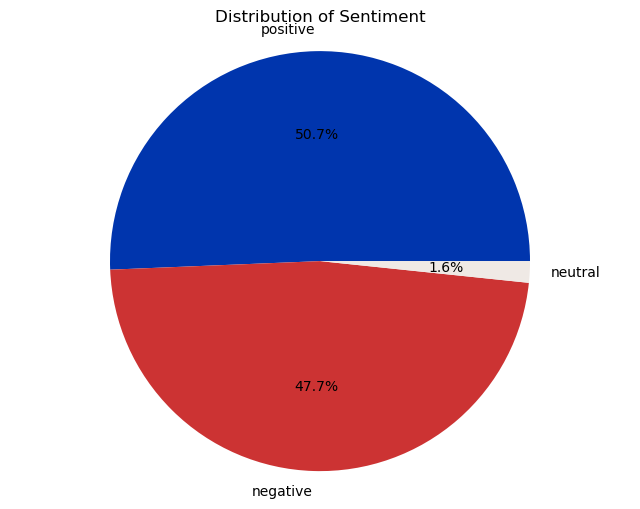

In [143]:
# Function to plot the distribution of sentiment as a pie chart with custom colors
def plot_sentiment_distribution_pie(sentiment_distribution):
    colors = ['#0035AD', '#CC3333', '#EFE9E5']
    plt.figure(figsize=(8, 6))
    plt.pie(sentiment_distribution, labels=sentiment_distribution.index, autopct='%1.1f%%', colors=colors)
    plt.title('Distribution of Sentiment')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

# Plot the distribution of sentiment as a pie chart with custom colors
plot_sentiment_distribution_pie(sentiment_distribution)

In conclusion, the analysis of customer reviews for British Airways revealed a predominantly positive sentiment among customers, with approximately 50.7% of reviews expressing positive sentiment, 47.7% expressing negative sentiment, and 1.6% expressing neutral sentiment. These insights provide valuable feedback for British Airways to understand customer perceptions and areas for improvement.